In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('https://amlgitsamples.blob.core.windows.net/churn/CATelcoCustomerChurnTrainingSample.csv')
df.head()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
0,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,5971,663,0,2015,1
1,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,3981,995,0,2015,2
2,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,7379,737,0,2015,1
3,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,1729,432,0,2015,2
4,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,216,144,No,No,0.48,3122,624,0,2015,1


churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

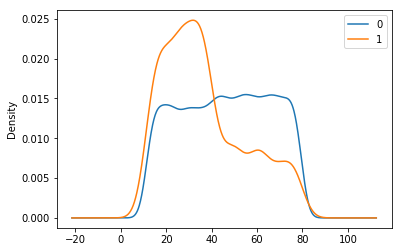

In [2]:
df.groupby('churn').age.plot(kind='kde',
                            legend=True)

In [167]:
age_by_bin = ["above_{0}".format(age) for age in range(0, 80, 40)]
print(age_by_bin)
df['age_by_bin'] = pd.cut(x=df['age'], 
                               bins=len(age_by_bin),
                               labels=age_by_bin)
df.drop(['age'], axis =1,inplace=True)
df.head()

['above_0', 'above_40']


,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,maritalstatus,...,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month,age_by_bin
0,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,Single,...,19,No,No,0.82,5971,663,0,2015,1,above_0
1,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,Single,...,19,No,No,0.82,3981,995,0,2015,2,above_0
2,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,Single,...,34,No,Yes,0.27,7379,737,0,2015,1,above_0
3,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,Single,...,34,No,Yes,0.27,1729,432,0,2015,2,above_0
4,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,Single,...,144,No,No,0.48,3122,624,0,2015,1,above_40


In [29]:
df[['year','month']] = df[['year','month']].astype('object')
#df = df.fillna(0)
df = df.drop_duplicates()
df = df.drop(['year','month'], axis = 1)

cat_cols = df.select_dtypes(include=['object','category']).columns
df.drop('customerid',axis=1, inplace=True)

print("categorical features",cat_cols)

num_cols = set(df.columns) - set(cat_cols)
print("numeric features",num_cols)

df = pd.get_dummies(data=df,
                       columns=cat_cols,
                       prefix='oh_')


assert(len(num_cols) == len(df.select_dtypes(include=['float64','int64']).columns))

categorical features Index(['customersuspended', 'education', 'gender', 'homeowner',
       'maritalstatus', 'noadditionallines', 'occupation', 'state',
       'usesinternetservice', 'usesvoiceservice'],
      dtype='object')
numeric features {'numberofcomplaints', 'unpaidbalance', 'churn', 'calldroprate', 'callfailurerate', 'avgcallduration', 'numberofmonthunpaid', 'percentagecalloutsidenetwork', 'callingnum', 'annualincome', 'totalminsusedinlastmonth', 'age', 'totalcallduration', 'penaltytoswitch', 'monthlybilledamount', 'numdayscontractequipmentplanexpiring'}


In [5]:
label ='churn'
y = df[label].values
X = df.loc[:, ~df.columns.isin(['churn'])].values

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler =StandardScaler()
X = scaler.fit_transform(X)
print(X.shape, y.shape,sep='\n')

(20468, 88)
(20468,)


In [31]:
import numpy as np

np.save('X.npy',X)
np.save('y.npy',y)

In [1]:
from entry import preprocess,to_normed_tensors

/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df2 = preprocess('https://amlgitsamples.blob.core.windows.net/churn/CATelcoCustomerChurnTrainingSample.csv')

   age  annualincome  calldroprate  callfailurerate  callingnum  customerid  \
0   12        168147          0.06             0.00  4251078442           1   
1   12        168147          0.06             0.00  4251078442           1   
2   42         29047          0.05             0.01  4251043419           2   
3   42         29047          0.05             0.01  4251043419           2   
4   58         27076          0.07             0.02  4251055773           3   

  customersuspended               education  gender homeowner  ...    \
0               Yes  Bachelor or equivalent    Male       Yes  ...     
1               Yes  Bachelor or equivalent    Male       Yes  ...     
2               Yes  Bachelor or equivalent  Female       Yes  ...     
3               Yes  Bachelor or equivalent  Female       Yes  ...     
4               Yes    Master or equivalent  Female       Yes  ...     

  totalminsusedinlastmonth  unpaidbalance usesinternetservice  \
0                       15 

In [3]:
(X_train,X_test,y_train,y_test) = to_normed_tensors(df2,123)

(20468, 85)
(20468,)


In [3]:
columns_to_encode = list(df.select_dtypes(include=['category','object']))
print(columns_to_encode)
for column_to_encode in columns_to_encode:
    dummies = pd.get_dummies(df[column_to_encode])
    one_hot_col_names = []
    for col_name in list(dummies.columns):
        one_hot_col_names.append(column_to_encode + '_' + col_name)
    dummies.columns = one_hot_col_names
    df = df.drop(column_to_encode, axis=1)
    df = df.join(dummies)

print("Encoded columns:")
print(df.columns)

['customersuspended', 'education', 'gender', 'homeowner', 'maritalstatus', 'noadditionallines', 'occupation', 'state', 'usesinternetservice', 'usesvoiceservice']
Encoded columns:
Index(['age', 'annualincome', 'calldroprate', 'callfailurerate', 'callingnum',
       'customerid', 'monthlybilledamount', 'numberofcomplaints',
       'numberofmonthunpaid', 'numdayscontractequipmentplanexpiring',
       'penaltytoswitch', 'totalminsusedinlastmonth', 'unpaidbalance',
       'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration',
       'churn', 'year', 'month', 'customersuspended_No',
       'customersuspended_Yes', 'education_Bachelor or equivalent',
       'education_High School or below', 'education_Master or equivalent',
       'education_PhD or equivalent', 'gender_Female', 'gender_Male',
       'homeowner_No', 'homeowner_Yes', 'maritalstatus_Married',
       'maritalstatus_Single', 'noadditionallines_\N',
       'occupation_Non-technology Related Job', 'occupation_Others

In [4]:
df.head()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,usesinternetservice_No,usesinternetservice_Yes,usesvoiceservice_No,usesvoiceservice_Yes
0,12,168147,0.06,0.00,4251078442,1,71,0,7,96,...,0,0,1,0,0,0,1,0,1,0
1,12,168147,0.06,0.00,4251078442,1,71,0,7,96,...,0,0,1,0,0,0,1,0,1,0
2,42,29047,0.05,0.01,4251043419,2,8,1,4,14,...,0,0,0,1,0,0,1,0,0,1
3,42,29047,0.05,0.01,4251043419,2,8,1,4,14,...,0,0,0,1,0,0,1,0,0,1
4,58,27076,0.07,0.02,4251055773,3,16,0,2,55,...,0,0,0,0,0,0,1,0,1,0
